
# Linear Regression 

There is an Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company wants to explore whether to focus their efforts on their mobile app development or their website.

Data is taken from 
<a href="https://www.kaggle.com/kolawale/focusing-on-mobile-app-or-website">link</a>

## Imports

In [51]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import plotly
import cufflinks as cf

## Get the Data

In [55]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [57]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

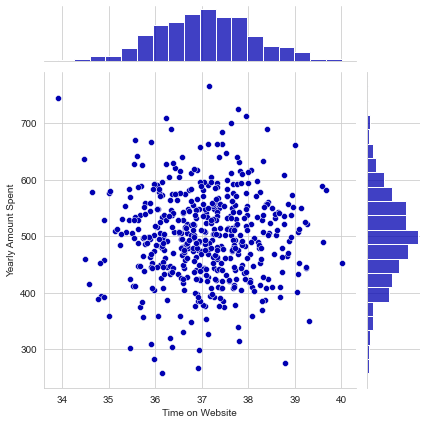

In [58]:
sb.set_palette("seismic")
sb.set_style('whitegrid')
sb.jointplot(x=df['Time on Website'],y=df['Yearly Amount Spent'])

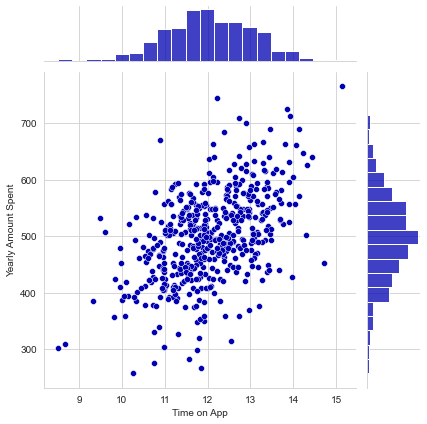

In [59]:
sb.jointplot(x=df['Time on App'],y=df['Yearly Amount Spent'])

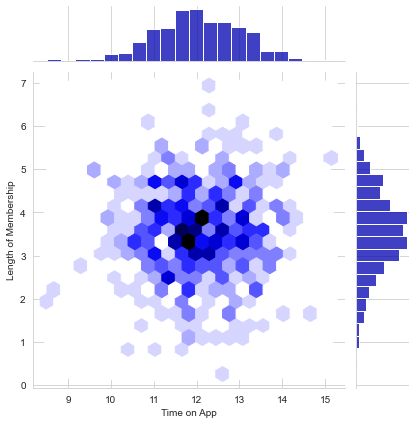

In [60]:
sb.jointplot(x= 'Time on App', y='Length of Membership', data= df, kind='hex' )

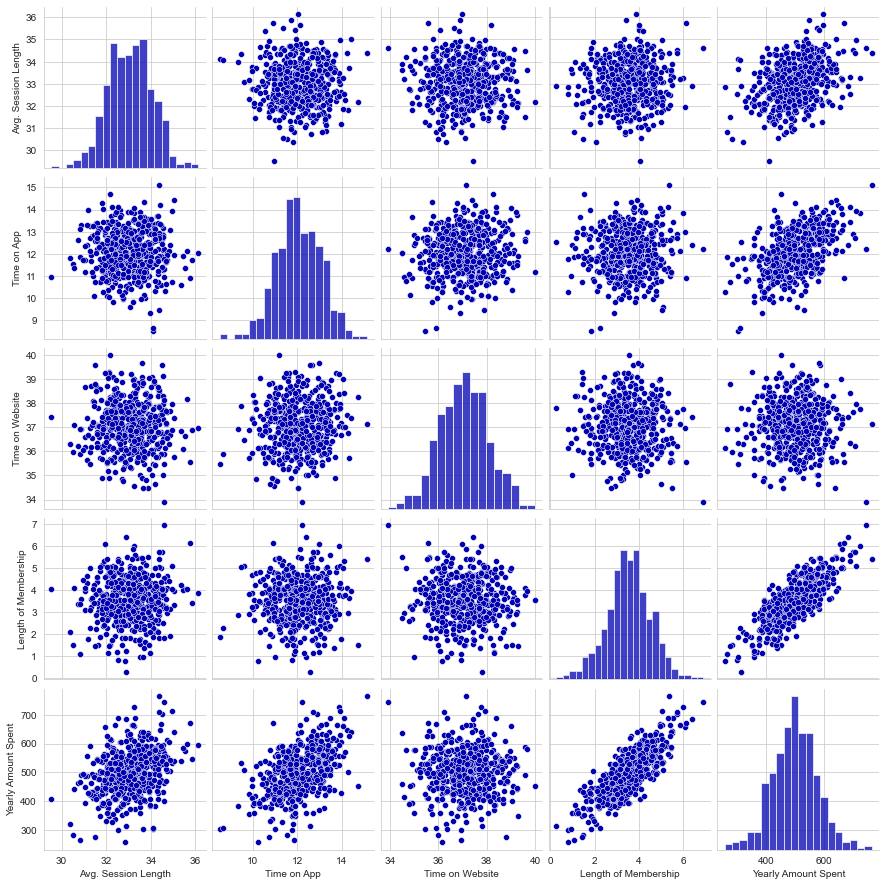

In [61]:
sb.pairplot(df)

## Creating the linear model

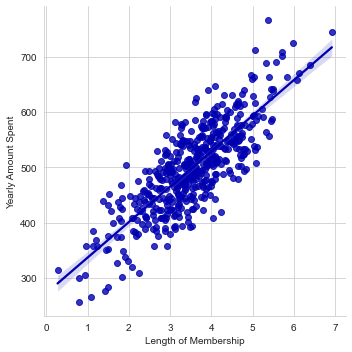

In [62]:
sb.lmplot(x = 'Length of Membership', y='Yearly Amount Spent', data=df)

## Training and Testing Data

In [63]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [64]:
# Features
x =  df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
# labels
y = df['Yearly Amount Spent']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Training the Model

In [68]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(x_train,y_train)

LinearRegression()

**Check out the coefficients of the model**

In [71]:
print(lm.intercept_)

-1047.932782250239


In [72]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data

In [73]:
predictions = lm.predict(x_test)

#### The scatterplot of the real test values versus the predicted values

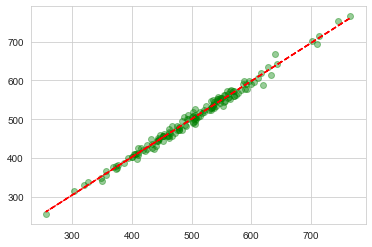

In [74]:
plt.scatter(y_test,predictions, c= 'green', alpha = 0.4)
m, b = py.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b, color='red',ls= '--')

## Evaluating the Model

In [85]:
from sklearn import metrics
print('MAE =', metrics.mean_absolute_error(y_test,predictions))
print('MSE =',metrics.mean_squared_error(y_test, predictions) )
print('RMSE =', py.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Accuracy of test dataset:", round(lm.score(x_test,y_test)*100),'%')

MAE = 7.228148653430834
MSE = 79.81305165097443
RMSE = 8.933815066978633
Accuracy of test dataset: 99 %


## Residuals

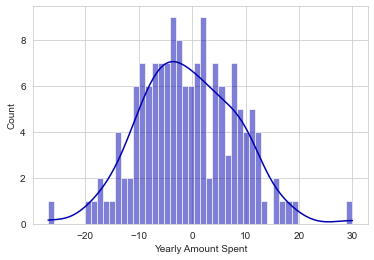

In [76]:
sb.histplot((y_test-predictions),bins=50, kde=True);

## Conclusion

In [77]:
df_coef = pd.DataFrame(lm.coef_,x_train.columns,columns=['Coefficient'])
df_coef

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


*by increasing the time on app (while other features are fixed), the yearly money spent has been increased while the the time on website does not have the same effect. So, the company may focus more on their mobile app *